In [322]:
import numpy as np
import geopandas as  gpd
import matplotlib.pyplot as plt

In [323]:
counties_df = gpd.read_file('cb_2018_us_county_500k/cb_2018_us_county_500k.shp')
cities_df = gpd.read_file('cities/citiesx010g.shp')

In [324]:
counties_df.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
2,21,031,00516862,0500000US21031,21031,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
3,21,065,00516879,0500000US21065,21065,Estill,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
4,21,069,00516881,0500000US21069,21069,Fleming,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."


In [325]:
cities_df.dtypes

GNIS_ID        float64
ANSICODE        object
FEATURE         object
FEATURE2        object
NAME            object
POP_2010       float64
COUNTY          object
COUNTYFIPS      object
STATE           object
STATE_FIPS      object
LATITUDE       float64
LONGITUDE      float64
PopPlLat       float64
PopPlLong      float64
ELEV_IN_M      float64
ELEV_IN_FT     float64
geometry      geometry
dtype: object

# Part: Load and prepare the geopandas dataframes

In [326]:
cities_df_final = cities_df.loc[cities_df['STATE'].isin(['IA', 'SD', 'IL', 'MN','IN'])]
cities_df_final.head()

,GNIS_ID,ANSICODE,FEATURE,FEATURE2,NAME,POP_2010,COUNTY,COUNTYFIPS,STATE,STATE_FIPS,LATITUDE,LONGITUDE,PopPlLat,PopPlLong,ELEV_IN_M,ELEV_IN_FT,geometry
191,644967.0,664474,Civil,-999,Hill City,633.0,Aitkin,001,MN,27,46.993285,-93.598562,46.993285,-93.598562,408.0,1339.0,POINT (-93.59856 46.99328)
237,649445.0,665301,Civil,County Seat,Pine City,3123.0,Pine,115,MN,27,45.826067,-92.968542,45.826067,-92.968542,290.0,951.0,POINT (-92.96854 45.82607)
260,1256558.0,1267485,Civil,County Seat,Mound City,71.0,Campbell,021,SD,46,45.725270,-100.068452,45.725270,-100.068452,525.0,1722.0,POINT (-100.06845 45.72527)
261,1254373.0,1267329,Civil,-999,Claremont,127.0,Brown,013,SD,46,45.671898,-98.015660,45.671898,-98.015660,397.0,1302.0,POINT (-98.01566 45.67190)
262,1265162.0,1267335,Civil,-999,Columbia,136.0,Brown,013,SD,46,45.613024,-98.312598,45.613024,-98.312598,397.0,1302.0,POINT (-98.31260 45.61302)


In [327]:
cities_df_final = cities_df_final.drop(['COUNTY', 'COUNTYFIPS'],axis=1)
cities_df_final = cities_df_final.loc[cities_df_final.FEATURE == 'Civil']

In [328]:
cities_df_final = cities_df_final.loc[cities_df_final.FEATURE == 'Civil']
cities_df_final.head()

,GNIS_ID,ANSICODE,FEATURE,FEATURE2,NAME,POP_2010,STATE,STATE_FIPS,LATITUDE,LONGITUDE,PopPlLat,PopPlLong,ELEV_IN_M,ELEV_IN_FT,geometry
191,644967.0,664474,Civil,-999,Hill City,633.0,MN,27,46.993285,-93.598562,46.993285,-93.598562,408.0,1339.0,POINT (-93.59856 46.99328)
237,649445.0,665301,Civil,County Seat,Pine City,3123.0,MN,27,45.826067,-92.968542,45.826067,-92.968542,290.0,951.0,POINT (-92.96854 45.82607)
260,1256558.0,1267485,Civil,County Seat,Mound City,71.0,SD,46,45.725270,-100.068452,45.725270,-100.068452,525.0,1722.0,POINT (-100.06845 45.72527)
261,1254373.0,1267329,Civil,-999,Claremont,127.0,SD,46,45.671898,-98.015660,45.671898,-98.015660,397.0,1302.0,POINT (-98.01566 45.67190)
262,1265162.0,1267335,Civil,-999,Columbia,136.0,SD,46,45.613024,-98.312598,45.613024,-98.312598,397.0,1302.0,POINT (-98.31260 45.61302)


In [329]:
counties_df_final = counties_df.loc[counties_df.STATEFP.isin(list(cities_df_final.STATE_FIPS.unique()))]
counties_df_final.loc[97]

STATEFP                                                    19
COUNTYFP                                                  175
COUNTYNS                                             00465276
AFFGEOID                                       0500000US19175
GEOID                                                   19175
NAME                                                    Union
LSAD                                                       06
ALAND                                              1097235806
AWATER                                                5575853
geometry    POLYGON ((-94.471013 41.047049, -94.470749 41....
Name: 97, dtype: object

In [330]:
STATE_FIPS_IA = cities_df.loc[cities_df.STATE == 'IA','STATE_FIPS'].unique()[0]

In [331]:
unprojected_counties_IA = counties_df_final.loc[counties_df_final.STATEFP==STATE_FIPS_IA]
unprojected_counties_IA.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
97,19,175,00465276,0500000US19175,19175,Union,06,1097235806,5575853,"POLYGON ((-94.47101 41.04705, -94.47075 41.057..."
148,19,001,00465190,0500000US19001,19001,Adair,06,1474404193,2597996,"POLYGON ((-94.70072 41.46725, -94.70057 41.482..."
149,19,045,00465211,0500000US19045,19045,Clinton,06,1799818638,39526958,"POLYGON ((-90.89894 41.91853, -90.89807 41.920..."
150,19,083,00465230,0500000US19083,19083,Hardin,06,1474505075,1776735,"POLYGON ((-93.49948 42.55770, -93.48076 42.557..."
151,19,111,00465244,0500000US19111,19111,Lee,06,1340448548,55266733,"POLYGON ((-91.71879 40.81354, -91.68010 40.813..."


# Part: compute the area of each county

In [332]:
counties_projeted_gdf = counties_df_final.copy()
counties_projeted_gdf['geometry'] = counties_projeted_gdf.geometry.to_crs('epsg:4087')
counties_projeted_gdf.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
11,17,091,00424247,0500000US17091,17091,Kankakee,06,1752121058,12440760,"POLYGON ((-9824112.153 4576813.812, -9822930.8..."
12,17,187,01785134,0500000US17187,17187,Warren,06,1404747944,1674135,"POLYGON ((-10106657.273 4523674.006, -10106647..."
13,17,197,01785190,0500000US17197,17197,Will,06,2164927644,34548925,"POLYGON ((-9825200.190 4644767.459, -9824475.7..."
14,18,027,00450343,0500000US18027,18027,Daviess,06,1112374406,19124393,"POLYGON ((-9715873.095 4307389.475, -9715143.8..."
15,18,061,00451677,0500000US18061,18061,Harrison,06,1254889433,5193186,"POLYGON ((-9609953.045 4250482.729, -9609589.4..."


# Part: inspect the projected and unprojected county geometry

In [333]:
projected_counties_IA = counties_projeted_gdf.loc[counties_projeted_gdf.STATEFP==STATE_FIPS_IA]

<AxesSubplot:>

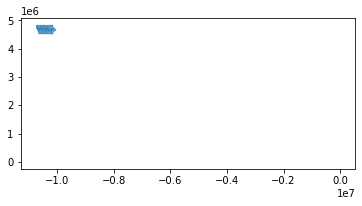

In [334]:
fig, ax = plt.subplots()
unprojected_counties_IA.plot(ax=ax)
projected_counties_IA.loc[counties_projeted_gdf.STATEFP==STATE_FIPS_IA].plot(ax=ax)

In [335]:
projected_counties_IA.geometry.area/(1000000)

97      1463.036997
148     1968.695374
149     2473.107835
150     1999.791858
151     1840.938265
           ...     
2986    2022.383465
3006    2434.392028
3031    2055.122315
3077    1514.110541
3174    3310.651428
Length: 99, dtype: float64

In [336]:
from googletrans import Translator

In [337]:
translator = Translator()

In [339]:
#d = translator.detect('বাংলাদেশসহ বিশ্বের সর্বশেষ সংবাদ শিরোনাম, প্রতিবেদন, বিশ্লেষণ, খেলা, বিনোদন, চাকরি')
translated = translator.translate('Бороди́нское сраже́ние')

AttributeError: 'NoneType' object has no attribute 'group'